# SVM Task

Classes: The dataset has two target classes:
Malignant (denoted by 0)
Benign (denoted by 1)

- radius_mean: Mean of distances from the center to points on the perimeter.
- texture_mean: Standard deviation of gray-scale values.
- perimeter_mean: Mean of perimeter values.
- area_mean: Mean of area values.
- smoothness_mean: Mean of local variation in radius lengths.
- compactness_mean: Mean of perimeter^2 / area - 1.0
- concavity_mean: Mean of severity of concave portions of the contour.
- concave points_mean: Mean for the number of concave portions of the contour.
- symmetry_mean: Mean of symmetry.
- fractal_dimension_mean: Mean of the "coastline approximation" - 1.
- radius_se: Standard error for radius.
- texture_se: Standard error for texture.
- perimeter_se: Standard error for perimeter.
- area_se: Standard error for area.
- smoothness_se: Standard error for smoothness.
- compactness_se: Standard error for compactness.
- concavity_se: Standard error for concavity.
- concave points_se: Standard error for concave points.
- symmetry_se: Standard error for symmetry.
- fractal_dimension_se: Standard error for fractal dimension.
- radius_worst: Worst or largest radius value.
- texture_worst: Worst texture value.
- perimeter_worst: Worst perimeter value.
- area_worst: Worst area value.
- smoothness_worst: Worst smoothness value.
- compactness_worst: Worst compactness value.
- concavity_worst: Worst concavity value.
- concave points_worst: Worst concave points value.
- symmetry_worst: Worst symmetry value.
- fractal_dimension_worst: Worst fractal dimension value.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC as SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler,  LabelEncoder
from svm_margin_plot import plot_svm_boundary


In [7]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"

# Assign the correct column names based on the dataset documentation
columns = ['ID', 'Diagnosis'] + [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
    'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean',
    'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se',
    'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se',
    'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst',
    'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst',
    'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]

# Load the dataset and assign these column names
data = pd.read_csv(url, header=None, names=columns)
data.drop(columns=['ID'], inplace=True)


In [8]:
data.head()

,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
data.Diagnosis.value_counts()

Diagnosis
B    357
M    212
Name: count, dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [11]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [12]:

data.isnull().sum()

Diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [13]:
# spilting the data
X=data.drop(columns=['Diagnosis'])  
y=data['Diagnosis']


In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.121, random_state=42)
 

In [15]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2,random_state=42)

In [16]:
le=LabelEncoder()
data['Diagnosis']=le.fit_transform(data['Diagnosis'])

In [17]:
data.duplicated().sum()

0

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Diagnosis                569 non-null    int32  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

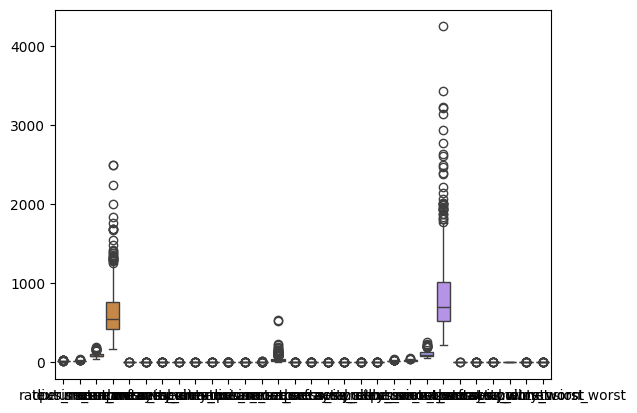

In [19]:
# we have alot of outliers in the data so we will use standard scaler to scale the data
sns.boxplot(data=x_train)
plt.show()

In [20]:
data.corr(numeric_only=True)

,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
Diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


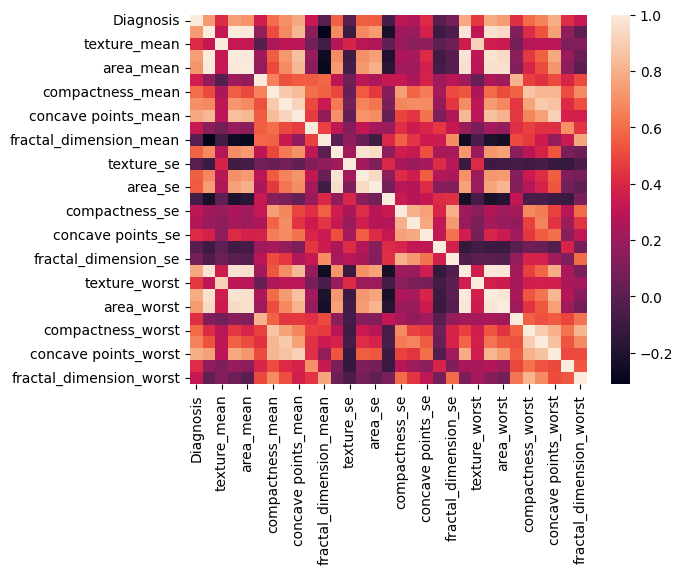

In [21]:
sns.heatmap(data.corr(numeric_only=True), annot=False, fmt=".2f")
plt.show()

 Correlation-selected features:
['concave points_worst', 'perimeter_worst', 'concave points_mean', 'radius_worst', 'perimeter_mean', 'area_worst', 'radius_mean', 'area_mean', 'concavity_mean', 'concavity_worst', 'compactness_mean', 'compactness_worst', 'radius_se', 'perimeter_se', 'area_se']

 RandomForest top features:
area_worst              0.139357
concave points_worst    0.132225
concave points_mean     0.107046
radius_worst            0.082848
perimeter_worst         0.080850
perimeter_mean          0.067990
concavity_mean          0.066917
area_mean               0.060462
concavity_worst         0.037339
radius_mean             0.034843
dtype: float64


C:\Users\DELL\AppData\Local\Temp\ipykernel_27548\1557618144.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.head(10), y=importances.head(10).index, palette="viridis")


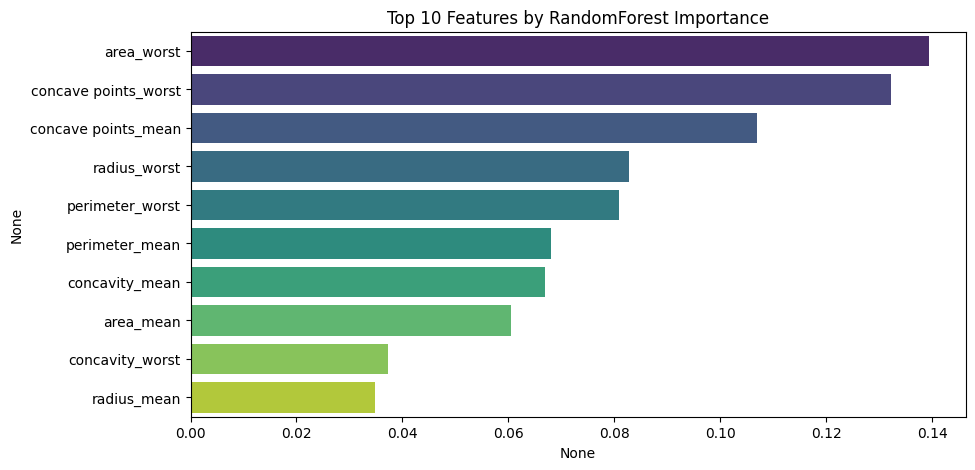

In [22]:

from sklearn.ensemble import RandomForestClassifier




# --- 1. Correlation-based selection ---
corr = data.corr()["Diagnosis"].drop("Diagnosis").sort_values(ascending=False)

# Keep top features with abs(corr) > 0.5
corr_features = corr[abs(corr) > 0.5].index.tolist()

print(" Correlation-selected features:")
print(corr_features)

# --- 2. Model-based feature importance ---
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

print("\n RandomForest top features:")
print(importances.head(10))

# Plot feature importances
plt.figure(figsize=(10,5))
sns.barplot(x=importances.head(10), y=importances.head(10).index, palette="viridis")
plt.title("Top 10 Features by RandomForest Importance")
plt.show()


In [23]:
#data.drop(['fractal_dimension_mean'], ['texture_se'], ['symmetry_se'], ['smoothness_se'], ['fractal_dimension_se'],inplace=True)

<Axes: xlabel='area_worst', ylabel='concave points_worst'>

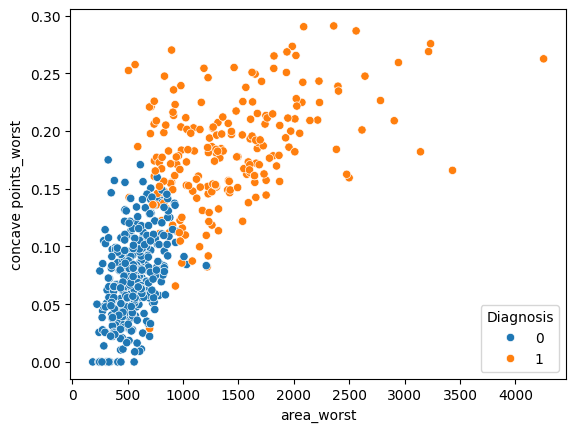

In [24]:
sns.scatterplot(data = data , x='area_worst', y='concave points_worst' , hue ='Diagnosis')

In [68]:
X = data[[ "area_worst","concave points_worst"]].values
y = data["Diagnosis"].values


In [69]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

In [71]:
# Train SVM
svm_linear = SVC(kernel="linear", C=1.0)
svm_linear.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


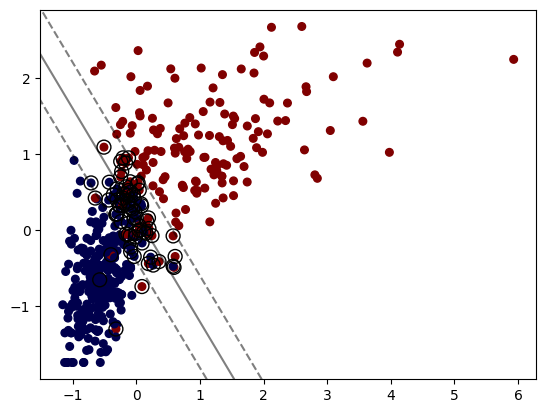

In [72]:


# Visualize decision boundary
plot_svm_boundary(svm_linear, X_train, y_train)

In [73]:
y_pred_linear = svm_linear.predict(X_test)
acc_linear = accuracy_score(y_test, y_pred_linear)

print(f"Linear Kernel SVM Accuracy: {acc_linear:.4f}")



Linear Kernel SVM Accuracy: 0.9649


In [75]:
#Train RBF Kernel SVM 
svm_rbf = SVC(kernel="rbf", C=1.0, gamma="scale")
svm_rbf.fit(X_train, y_train)



,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [76]:
y_pred_rbf = svm_rbf.predict(X_test)
acc_rbf = accuracy_score(y_test, y_pred_rbf)

In [77]:
print(f" RBF Kernel SVM Accuracy: {acc_rbf:.4f}")

 RBF Kernel SVM Accuracy: 0.9474


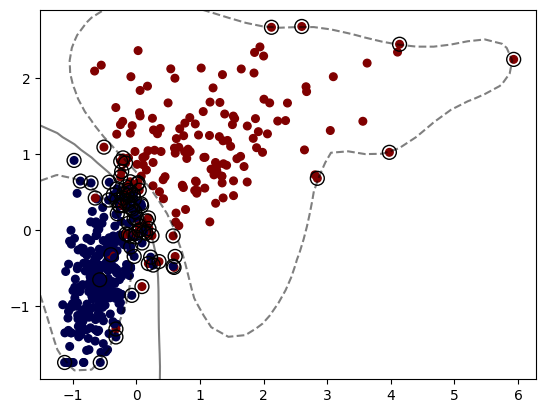

In [78]:
plot_svm_boundary(svm_rbf, X_train, y_train)

In [79]:
#Train Poly Kernel SVM 
svm_poly = SVC(kernel="poly", degree=3, C=1.0, gamma="scale")
svm_poly.fit(X_train, y_train)

,C,1.0
,kernel,'poly'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [80]:
y_pred_poly = svm_poly.predict(X_test)
acc_poly = accuracy_score(y_test, y_pred_poly)

print(f" Poly Kernel SVM Accuracy: {acc_poly:.4f}")

 Poly Kernel SVM Accuracy: 0.9035


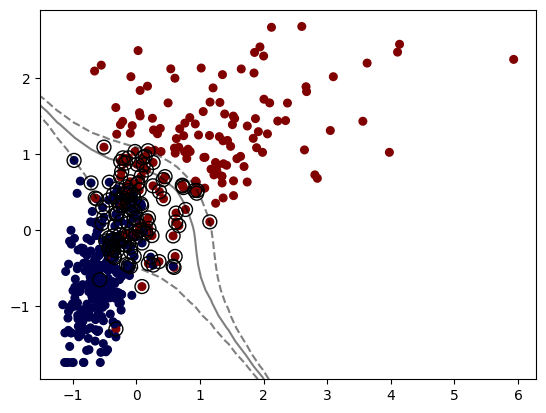

In [81]:
plot_svm_boundary(svm_poly, X_train, y_train)

In [82]:
print(" Accuracy Comparison:")
print(f"Linear Kernel: {acc_linear:.4f}")
print(f"RBF Kernel:   {acc_rbf:.4f}")
print(f"Poly Kernel:  {acc_poly:.4f}")

 Accuracy Comparison:
Linear Kernel: 0.9649
RBF Kernel:   0.9474
Poly Kernel:  0.9035


In [85]:
from sklearn.model_selection import validation_curve
#Tune C
C_values = [0.01, 0.1, 1, 10, 100]

train_scores, val_scores = validation_curve(
    SVC(kernel="poly", degree=3, gamma="scale"),
    X_train, y_train,
    param_name="C",
    param_range=C_values,
    cv=5,
    scoring="accuracy"
)




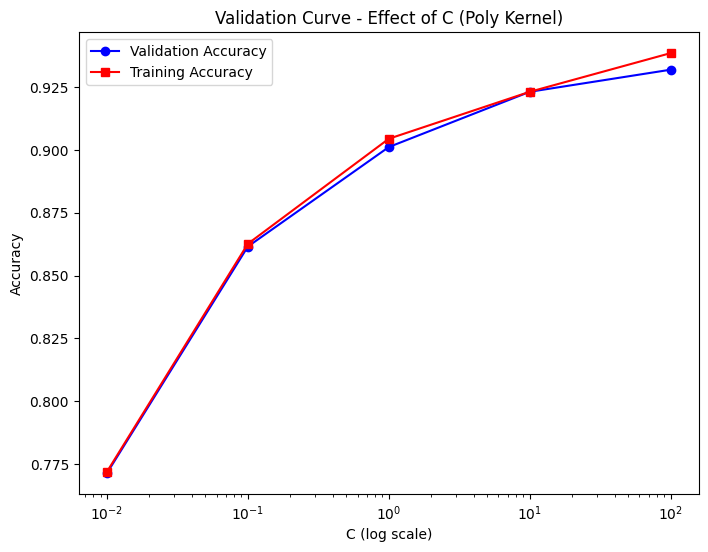

In [86]:
# Mean accuracy across folds
train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

plt.figure(figsize=(8,6))
plt.plot(C_values, val_mean, marker="o", label="Validation Accuracy", color="blue")
plt.plot(C_values, train_mean, marker="s", label="Training Accuracy", color="red")
plt.xscale("log")
plt.xlabel("C (log scale)")
plt.ylabel("Accuracy")
plt.title("Validation Curve - Effect of C (Poly Kernel)")
plt.legend()
plt.show()

In [88]:
#Tune gamma
gamma_values = [0.001, 0.01, 0.1, 1]

train_scores, val_scores = validation_curve(
    SVC(kernel="poly", degree=3, C=1),
    X_train, y_train,
    param_name="gamma",
    param_range=gamma_values,
    cv=5,
    scoring="accuracy"
)




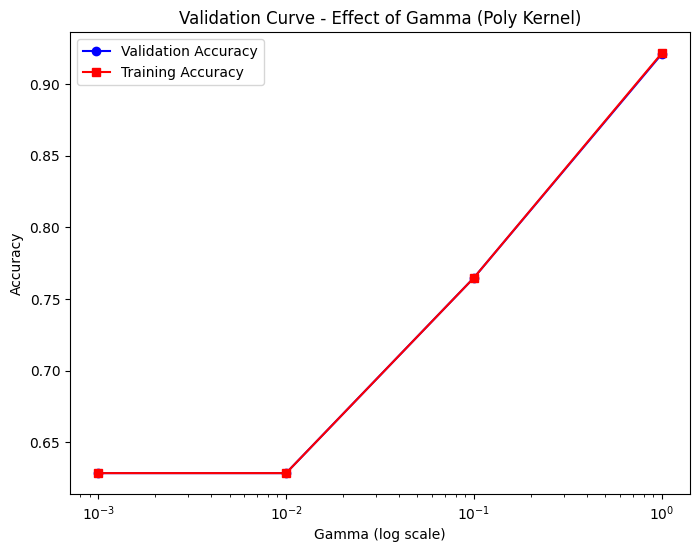

In [89]:
train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

plt.figure(figsize=(8,6))
plt.plot(gamma_values, val_mean, marker="o", label="Validation Accuracy", color="blue")
plt.plot(gamma_values, train_mean, marker="s", label="Training Accuracy", color="red")
plt.xscale("log")
plt.xlabel("Gamma (log scale)")
plt.ylabel("Accuracy")
plt.title("Validation Curve - Effect of Gamma (Poly Kernel)")
plt.legend()
plt.show()

In [90]:
import time

# Function to measure training & prediction times
def measure_time(X_train, y_train, X_test, y_test, kernel="linear", C=1.0, gamma="scale"):
    clf = SVC(kernel=kernel, C=C, gamma=gamma)

    # Training time
    start_train = time.time()
    clf.fit(X_train, y_train)
    end_train = time.time()
    training_time = end_train - start_train

    # Prediction time
    start_pred = time.time()
    clf.predict(X_test)
    end_pred = time.time()
    prediction_time = end_pred - start_pred

    return training_time, prediction_time


In [91]:
# Case 1: 10% training set, linear kernel
n_samples = int(0.1 * len(X_train))  # 10% of training set
X_sub, y_sub = X_train[:n_samples], y_train[:n_samples]

t1, p1 = measure_time(X_sub, y_sub, X_test, y_test, kernel="linear", C=1)

# Case 2: 100% training set, linear kernel
t2, p2 = measure_time(X_train, y_train, X_test, y_test, kernel="linear", C=1)

# Case 3: 10% training set, RBF kernel
t3, p3 = measure_time(X_sub, y_sub, X_test, y_test, kernel="rbf", C=1, gamma=0.01)

# Case 4: 100% training set, RBF kernel
t4, p4 = measure_time(X_train, y_train, X_test, y_test, kernel="rbf", C=1, gamma=0.01)


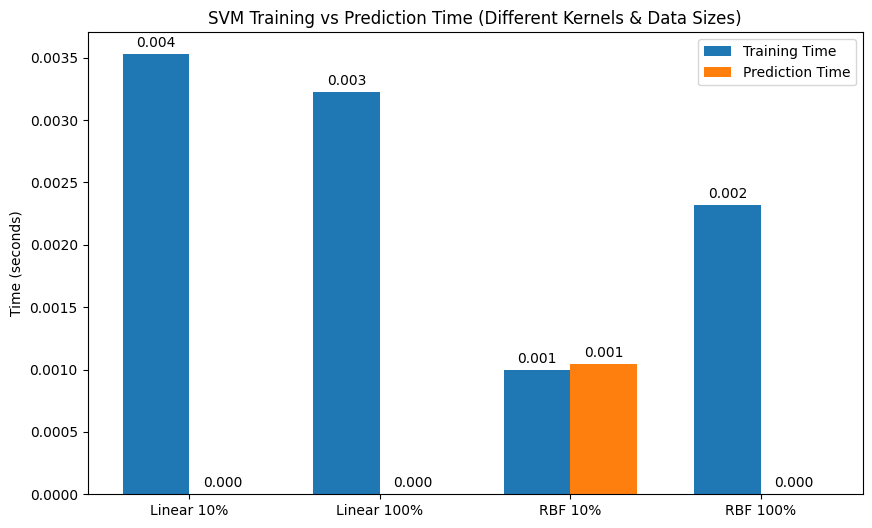

In [92]:
# Data for plotting
cases = ["Linear 10%", "Linear 100%", "RBF 10%", "RBF 100%"]
training_times = [t1, t2, t3, t4]
prediction_times = [p1, p2, p3, p4]

x = np.arange(len(cases))
width = 0.35

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - width/2, training_times, width, label="Training Time")
rects2 = ax.bar(x + width/2, prediction_times, width, label="Prediction Time")

ax.set_ylabel("Time (seconds)")
ax.set_title("SVM Training vs Prediction Time (Different Kernels & Data Sizes)")
ax.set_xticks(x)
ax.set_xticklabels(cases)
ax.legend()

# Annotate bars
for rect in rects1 + rects2:
    height = rect.get_height()
    ax.annotate(f"{height:.3f}",
                xy=(rect.get_x() + rect.get_width()/2, height),
                xytext=(0,3),  # offset
                textcoords="offset points",
                ha="center", va="bottom")

plt.show()


# Linear vs RBF:
Linear kernel is much faster in both training & prediction.
RBF takes longer since it computes similarity functions for each pair of samples.

# 10% vs 100%:
Training time increases significantly with dataset size.
Prediction time also grows, but less drastically.

In [ ]:
# Overlapping classes
# Copy original data
X_overlap = X_train.copy()
y_overlap = y_train.copy()

# Reduce separability: shift one feature for class=1
X_overlap[y_overlap == 1, 0] = X_overlap[y_overlap == 1, 0] - 0.5

# Retrain with RBF SVM
svm_overlap = SVC(kernel="rbf", C=1, gamma=0.01)
svm_overlap.fit(X_overlap, y_overlap)

y_val_overlap = svm_overlap.predict(X_test)
acc_overlap = accuracy_score(y_test, y_val_overlap)

print(" Accuracy with clean data (RBF):", acc_rbf)
print(" Accuracy with overlapping classes:", acc_overlap)


 Accuracy with clean data (RBF): 0.9473684210526315
 Accuracy with overlapping classes: 0.9473684210526315


Overlapping Classes

Accuracy drops because SVM struggles to find a clear margin.

Misclassification increases in the overlapping region.

In [ ]:
# Noisy data
# Add Gaussian noise to 10% of samples
np.random.seed(42)
n_noisy = int(0.1 * len(X_train))
indices = np.random.choice(len(X_train), n_noisy, replace=False)

X_noisy = X_train.copy()
X_noisy[indices] += np.random.normal(0, 0.5, X_noisy[indices].shape)

# Retrain with RBF SVM (tuned parameters from grid search, e.g., C=10, gamma=0.01)
svm_noisy = SVC(kernel="rbf", C=10, gamma=0.01)
svm_noisy.fit(X_noisy, y_train)

# Accuracy on validation and test sets
y_val_noisy = svm_noisy.predict(X_test)
acc_noisy = accuracy_score(y_test, y_val_noisy)

print(" Accuracy with clean data (RBF tuned):", acc_rbf)
print(" Accuracy with noisy data:", acc_noisy)


 Accuracy with clean data (RBF tuned): 0.9473684210526315
 Accuracy with noisy data: 0.9385964912280702


Noisy Data

Gaussian noise distorts the boundary → reduces accuracy.

RBF kernel is somewhat robust, but too much noise leads to overfitting or underfitting depending on C and gamma.

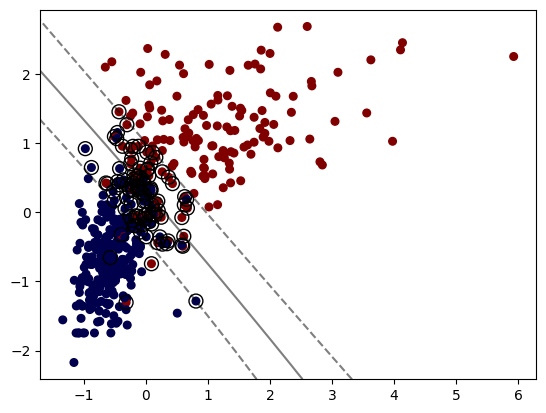

In [95]:
plot_svm_boundary(svm_noisy, X_noisy, y_train)

SVM works best with clear separation between classes.

Overlapping classes → margin shrinks, accuracy drops.

Noisy data → decision boundary becomes irregular, accuracy drops further.

Parameter tuning (C, gamma) can help, but SVM is still sensitive to noise.